# I. Business understanding

In the Business Understanding phase, the main goal is to define the project objectives and requirements from a business perspective.

#### **Objective:**
The primary objective of this project is to build a predictive model that can accurately estimate the Manufacturer's Suggested Retail Price (MSRP) of a car based on various attributes. This prediction can be useful for:

- **Car manufacturers**: To set competitive prices for new car models.
- **Dealerships**: To evaluate the market value of used cars.
- **Consumers**: To assess whether a car is priced fairly when buying or selling.
- **Market analysts**: To understand pricing trends and factors influencing car prices.

#### **Key Business Questions:**

1. **What factors influence car prices the most?**
   - Understanding the impact of factors such as engine horsepower, number of cylinders, year of manufacture, brand (make), and vehicle size/style on car pricing.
   
2. **How can we use these factors to predict MSRP?**
   - Develop a model that uses these factors to accurately predict the MSRP of a car.

3. **How can the model help improve business decisions?**
   - Identify how the model’s predictions can support pricing strategies, inventory management, and sales negotiations.

4. **What is the potential financial impact of mispricing?**
   - Consider the costs associated with underpricing or overpricing cars, including lost revenue or reduced competitiveness.

#### **Target Variable:**
- **`msrp`**: This is the target variable that we are trying to predict. It represents the Manufacturer's Suggested Retail Price of the car.

#### **Features (Columns):**
Each of the columns you’ve listed represents a feature that could potentially influence the car’s MSRP. Here’s a brief description of each and how it might relate to the business problem:

- **`make`**: The manufacturer of the car. Different brands have different market perceptions and pricing strategies.
  
- **`model`**: Specific model of the car. Some models are more popular and therefore might have a higher MSRP.

- **`year`**: The manufacturing year of the car. Newer cars typically have higher MSRPs.

- **`engine_fuel_type`**: Type of fuel used by the engine (e.g., petrol, diesel, electric). Fuel type can influence the price due to performance, efficiency, and market demand factors.

- **`engine_hp`**: Horsepower of the engine. Higher horsepower often correlates with higher prices.

- **`engine_cylinders`**: Number of cylinders in the engine. This can influence the power and performance, which in turn affects the price.

- **`transmission_type`**: Type of transmission (e.g., automatic, manual). Transmission type can impact consumer preference and pricing.

- **`driven_wheels`**: The wheels that receive power from the engine (e.g., front-wheel drive, all-wheel drive). This feature affects performance and is often reflected in the MSRP.

- **`number_of_doors`**: Number of doors in the car. This is related to vehicle style and practicality, which can influence the price.

- **`market_category`**: A categorization of the vehicle (e.g., luxury, crossover). This is directly related to pricing as different categories target different market segments.

- **`vehicle_size`**: Size of the vehicle (e.g., compact, midsize, large). Larger vehicles often have higher MSRPs.

- **`vehicle_style`**: Style of the vehicle (e.g., sedan, SUV, hatchback). The style impacts consumer preference and pricing.

- **`highway_mpg`**: Fuel efficiency on highways. Cars with better fuel efficiency might have different pricing strategies.

- **`city_mpg`**: Fuel efficiency in city driving. Similar to highway mpg, it influences consumer perception and pricing.

- **`popularity`**: Popularity of the vehicle or brand. More popular vehicles might be priced higher due to demand.

#### **Potential Constraints:**
- **Market Fluctuations**: Car prices can fluctuate based on market conditions, economic factors, and consumer preferences.
- **Data Limitations**: Ensure that the data is up-to-date and representative of the current market.
- **Regulatory Considerations**: Prices might be influenced by government regulations or incentives for certain types of vehicles (e.g., electric cars).

#### **Success Criteria:**
- **Accuracy**: The predictive model should have a high degree of accuracy, minimizing the difference between the predicted MSRP and the actual MSRP.
- **Business Impact**: The model should provide actionable insights that can be used to improve pricing strategies and decision-making processes.
- **Scalability**: The model should be scalable and applicable to different markets or regions, considering local pricing dynamics.


In [37]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('data.csv')

In [3]:
##display the first five rows of the train dataset.
train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# II. Data Understanding

After defining the business objectives and the problem in the Business Understanding phase, the next step in the CRISP-DM process is **Data Understanding**. This phase involves collecting, exploring, and analyzing the data to gain insights and determine the data's quality, relevance, and characteristics. The goal is to ensure that the data is suitable for the analysis and modeling tasks that will follow.

Here’s how you can approach the Data Understanding phase for your car price prediction project:

### 1. **Data Collection**
   - **Objective:** Gather all relevant data necessary for the analysis.
   - **Available Data:** In your project, you have a dataset containing the following columns: 
     - `'make'`, `'model'`, `'year'`, `'engine_fuel_type'`, `'engine_hp'`, `'engine_cylinders'`, `'transmission_type'`, `'driven_wheels'`, `'number_of_doors'`, `'market_category'`, `'vehicle_size'`, `'vehicle_style'`, `'highway_mpg'`, `'city_mpg'`, `'popularity'`, `'msrp'`.
   - **Actions:**
     - Verify that you have all the columns and data needed for the project.
     - Ensure the data is accessible and in a usable format (e.g., CSV, Excel, database).

### 2. **Data Description**
   - **Objective:** Describe the data to understand its structure and types.
   - **Actions:**
     - **Data Types:** Examine the data types of each column to ensure they are appropriate (e.g., `'year'` should be an integer, `'make'` and `'model'` should be categorical).
     - **Data Distribution:** Understand the distribution of each feature. This includes examining statistics such as mean, median, standard deviation, and range for numerical features like `'engine_hp'` and `'msrp'`.
     - **Class Balance:** For categorical variables like `'make'`, `'engine_fuel_type'`, and `'transmission_type'`, check the balance of different categories. Imbalances might require special handling during modeling.


### 3. **Initial Data Exploration**
   - **Objective:** Conduct an initial exploration to uncover patterns, relationships, and potential issues in the data.
   - **Actions:**
     - **Correlation Analysis:** Generate a correlation matrix to see how numerical features relate to the target variable (`'msrp'`) and to each other. This helps identify potential predictors and multicollinearity issues.
     - **Visual Exploration:** Use plots such as histograms, box plots, scatter plots, and heatmaps to visualize data distribution and relationships. For example:
       - **Histograms:** To visualize the distribution of `'msrp'`.
       - **Box Plots:** To identify outliers in numerical features like `'engine_hp'`.
       - **Scatter Plots:** To explore relationships between features, e.g., `'engine_hp'` vs. `'msrp'`.
       - **Heatmap:** To visualize correlations between numerical variables.
   


### 4. **Assess Data Quality**
   - **Objective:** Identify and address any data quality issues that could impact the analysis.
   - **Actions:**
     - **Missing Values:** Check for missing data in each column. Assess the extent of missing values and determine appropriate handling strategies (e.g., imputation, removal).
     - **Outliers:** Identify outliers in numerical features. Outliers can skew analysis and might need to be addressed, especially in the target variable (`'msrp'`).
     - **Consistency Checks:** Ensure data consistency across different features. For example, check if the `'number_of_doors'` is consistent with the `'vehicle_style'`.
     - **Duplicates:** Check for and handle duplicate rows, as they can introduce bias in the analysis.

   
### 5. **Data Distribution and Relationships**
   - **Objective:** Deepen your understanding of how features relate to the target variable (`'msrp'`) and to each other.
   - **Actions:**
     - **Target Variable Analysis:** Explore the distribution of `'msrp'` after any transformations. Look for skewness, kurtosis, and other distribution characteristics.
     - **Feature Interaction:** Explore interactions between features and how they collectively affect the target variable. For example, how do `'engine_hp'` and `'vehicle_size'` together influence `'msrp'`?
     - **Market Segmentation:** If applicable, explore if different segments (e.g., luxury vs. economy cars) exhibit different patterns.


### Summary of Data Understanding:
During the Data Understanding phase, you’ve collected, described, and explored the dataset to gain insights into its structure and characteristics. Key activities include understanding the distribution of features, assessing correlations, identifying data quality issues, and exploring how different features relate to the target variable (`'msrp'`). These insights are crucial for guiding the next phase—Data Preparation—where you'll clean and transform the data for modeling.

### 2. **Data Description**
   - **Objective:** Describe the data to understand its structure and types.


- Check Missing values
- Check Duplicates

- Check data type

- Check the number of unique values of each column

- Check statistics of the dataset

- Check various categories present in the different categorical columns

In [40]:
# check Missing value
train.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [42]:
# Check Duplication
train.duplicated().sum()

715

In [44]:
#Check datatype
train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                 float64
dtype: object

In [46]:
# Check the number of unique values of each column
train.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [48]:
#Check statistics of data set
train.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,10.113729
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,1.105703
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,7.601402
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,9.952325
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,10.308819
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,10.650939
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,14.541078


In [10]:
train.columns = train.columns.str.lower().str.replace(' ', '_')

In [12]:
train['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [14]:
strings = list(train.dtypes[train.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [16]:
for col in strings:
    train[col] = train[col].str.lower().str.replace(' ', '_')

In [18]:
train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## Data processing 

### Target Variable

- (MSRP) is the price that a product's manufacturer recommends it be sold for at the point of sale 
- msrp is the variable we need to predict. So let's do some analysis on this variable first.




 mu = 40594.74 and sigma = 60106.58



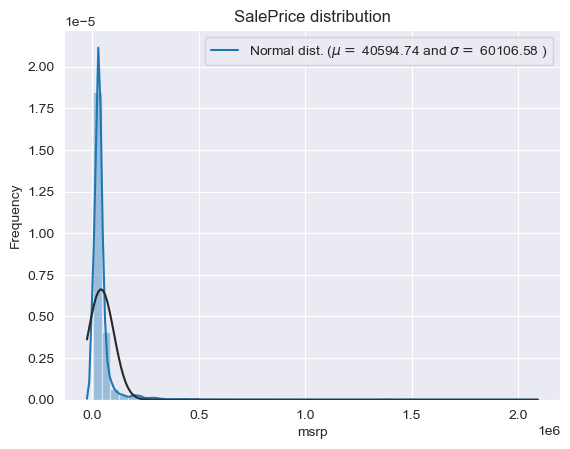

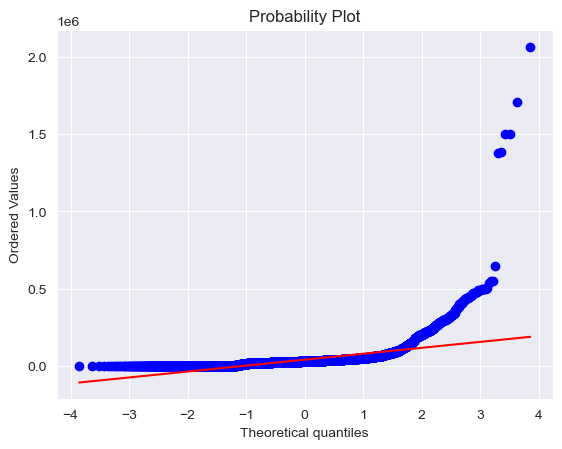

In [23]:
sns.distplot(train['msrp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['msrp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['msrp'], plot=plt)
plt.show()

The analysis of the distribution and the Q-Q plot shows that the 'msrp' variable is heavily skewed with significant outliers. It does not follow a normal distribution, which could affect any analysis or modeling that assumes normality.

### Log-transformation of the target variable


 mu = 10.11 and sigma = 1.11



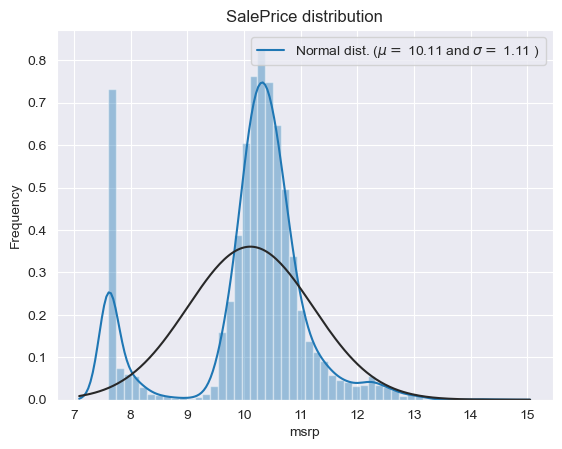

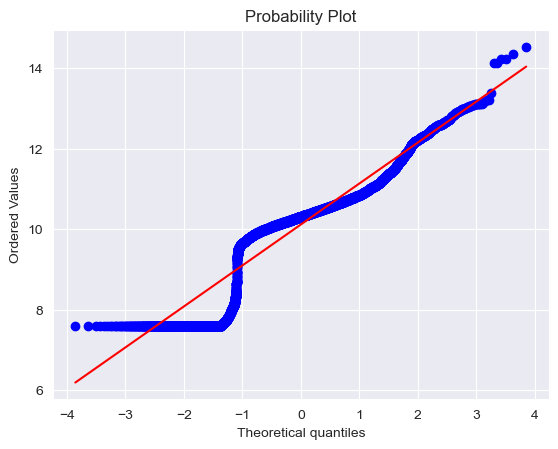

In [24]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["msrp"] = np.log1p(train["msrp"])

#Check the new distribution 
sns.distplot(train['msrp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['msrp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['msrp'], plot=plt)
plt.show()

### Missing Data

In [27]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
market_category,31.408427
engine_hp,0.579151
engine_cylinders,0.251805
number_of_doors,0.050361
engine_fuel_type,0.025180


Text(0.5, 1.0, 'Percent missing data by feature')

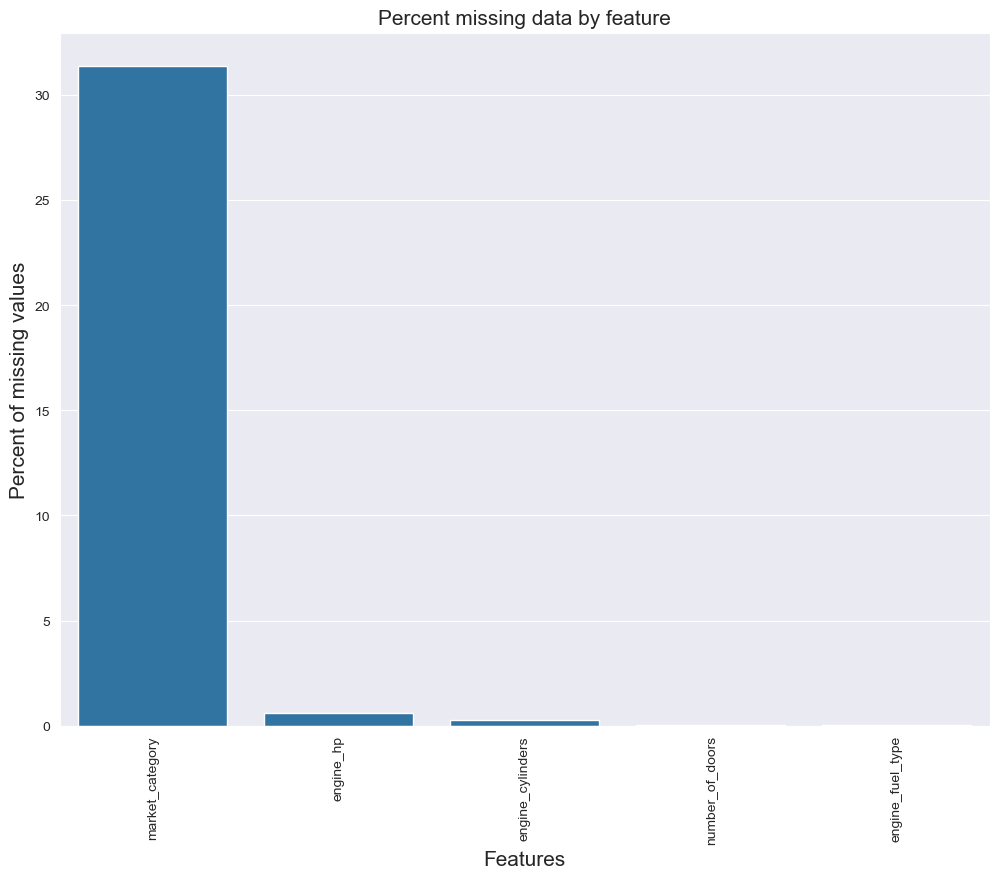

In [30]:
f, ax = plt.subplots(figsize=(12, 9))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Data Correlation

In [33]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Tạo DataFrame chỉ chứa các cột số
numeric_df = train[numeric_cols]

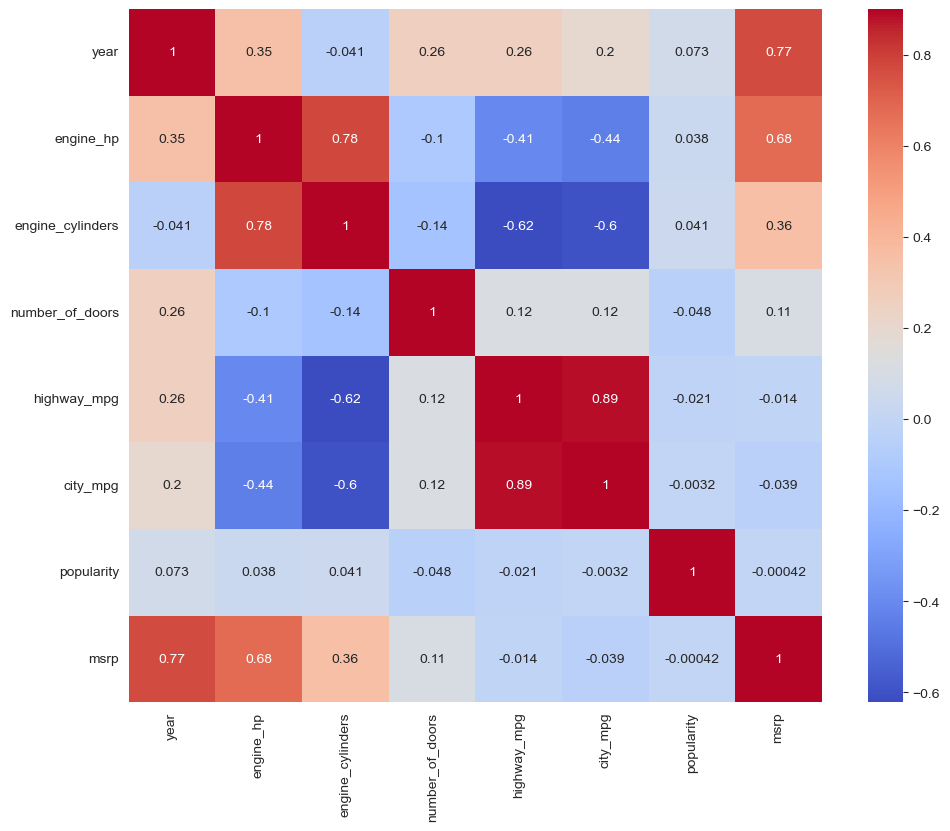

In [36]:
#Correlation map to see how features are correlated with SalePrice
corrmat = numeric_df.corr()
# Vẽ biểu đồ heatmap với bảng màu "coolwarm"
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap="coolwarm", annot=True)
plt.show()

In [38]:
train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

### Setting up the validation framework

In [53]:
# Calculate the number of samples in the entire dataset
df = train.copy()

n = len(df)

# Determine the number of samples for each dataset: train, validation, and test
n_val = int(n * 0.2)  # 20% of the data for validation
n_test = int(n * 0.2)  # 20% of the data for testing
n_train = n - n_val - n_test  # The remaining 60% for training

# Shuffle the data to ensure randomness and reduce bias
idx = np.arange(n)
np.random.seed(2)  # Setting a seed for reproducibility
np.random.shuffle(idx)  # Shuffle the indices

# Split the dataset into train, validation, and test sets based on indices
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# Assuming 'y' is the target variable in the original DataFrame
y = df['msrp']  

# Split the target variable into y_train, y_val, and y_test
y_train = y.iloc[idx[:n_train]]
y_val = y.iloc[idx[n_train:n_train+n_val]]
y_test = y.iloc[idx[n_train+n_val:]]

# Reset the index for each dataset to simplify further operations
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Now the dataset is split into three parts: df_train, df_val, and df_test
# Similarly, the target variable is split into y_train, y_val, and y_test


In [54]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### Car price baseline model     

In [50]:
print(df_train.columns)

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')


In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  # Create a column of ones for the intercept term
    X = np.column_stack([ones, X])  # Add the intercept term to the features

    XTX = X.T.dot(X)  # Compute X^T * X
    XTX_inv = np.linalg.inv(XTX)  # Compute the inverse of X^T * X
    w_full = XTX_inv.dot(X.T).dot(y)  # Compute the weights using the normal equation

    return w_full[0], w_full[1:]  # Return the intercept and the weights for the features

In [55]:
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [56]:
print(w)
print(w0)

[ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]
7.927257388070112


<Axes: xlabel='msrp', ylabel='Count'>

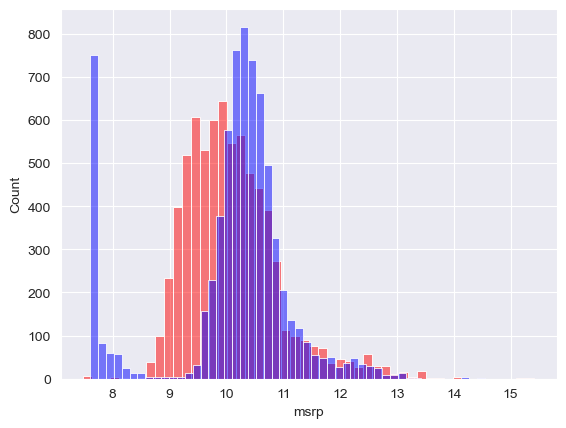

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

**RMSE**

In [58]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [59]:
rmse(y_train, y_pred)

0.7554192603920132

**Validating the model**

In [60]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [61]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301608

#### Categorical variables

In [66]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [67]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [68]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

1186.874474023634

In [69]:
w0, w

(2.2188634096833324e+16,
 array([-6.81651096e+00, -1.90869095e+01, -7.89425107e+01, -1.07770343e+02,
         2.38930533e-02, -6.94050130e+01, -1.14785375e+05, -1.15494870e+05,
        -1.14639299e+05,  8.54320819e+01, -1.67639211e+02, -6.76150963e+01,
         6.93313567e+02, -3.55053392e+01,  1.32882227e+02, -8.85080058e+02,
         2.25736344e+02,  1.79815398e+02, -2.86732774e+03, -4.83465025e+03,
        -4.34862174e+03, -4.64476730e+03, -4.98520840e+03, -4.63356569e+03,
        -2.21886341e+16, -2.21886341e+16, -2.21886341e+16, -2.21886341e+16,
        -1.35401806e+01, -1.07956356e+01,  6.00168522e+01,  2.59147889e+02,
         6.16557670e+01, -1.12572838e+02, -2.55658781e+02, -2.56718835e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

### Regularization

In [70]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286204368

### Tuning the Model

In [72]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 2.2188634096833324e+16 1186.874474023634
1e-05 6.398609911018562 0.4608153059057127
0.0001 7.123460125218161 0.4608153639451674
0.001 7.130893282891831 0.4608158584430818
0.1 7.000232411796987 0.4608736549113679
1 6.2507478473706115 0.46158128382725866
10 4.72951258567708 0.4726098772668483


In [73]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4608158584430818

## Using the model

In [74]:
# Combine the training and validation datasets into a single full training set
df_full_train = pd.concat([df_train, df_val])

# Reset the index of the full training set to ensure continuous indexing
df_full_train = df_full_train.reset_index(drop=True)


In [75]:
# Prepare the feature matrix for the full training set
X_full_train = prepare_X(df_full_train)

In [76]:
# Combine the target values from training and validation sets
y_full_train = np.concatenate([y_train, y_val])


In [77]:
# Train the regularized linear regression model on the full training set
# Use the optimal regularization parameter found in the tuning step (r=0.001)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [78]:
# Prepare the feature matrix for the test set
X_test = prepare_X(df_test)

# Use the trained model to predict on the test set
y_pred = w0 + X_test.dot(w)

# Calculate the RMSE to evaluate the model's performance on the test set
score = rmse(y_test, y_pred)
print(f"RMSE on the test set: {score}")


RMSE on the test set: 0.4600753970560443


In [79]:
# Example of predicting the price for a specific car in the test set
car = df_test.iloc[20].to_dict()  # Select a specific car from the test set
df_small = pd.DataFrame([car])    # Create a DataFrame for this car

# Prepare the feature matrix for the selected car
X_small = prepare_X(df_small)

# Predict the price for the selected car
y_pred_single = w0 + X_small.dot(w)
y_pred_single = y_pred_single[0]

# Convert the predicted log price back to the original scale
predicted_price = np.expm1(y_pred_single)
print(f"Predicted price for the selected car: {predicted_price}")

# Convert the actual price in y_test back to the original scale for comparison
actual_price = np.expm1(y_test[20])
print(f"Actual price for the selected car: {actual_price}")


Predicted price for the selected car: 41459.33645013401
Actual price for the selected car: 35000.00000000001


In [80]:
# Create a DataFrame to compare actual vs predicted values on the test set
pred_df = pd.DataFrame({
    'Actual Value': np.expm1(y_test),  # Convert log-transformed actual values back to original scale
    'Predicted Value': np.expm1(y_pred),  # Convert log-transformed predicted values back to original scale
    'Difference': np.expm1(y_test) - np.expm1(y_pred)  # Calculate the difference between actual and predicted values
})

# Display the DataFrame
pred_df

,Actual Value,Predicted Value,Difference
0,2000.0,3483.075033,-1483.075033
1,3211.0,11750.789873,-8539.789873
2,31120.0,33981.487583,-2861.487583
3,2000.0,2099.746538,-99.746538
4,29905.0,26046.414010,3858.585990
...,...,...,...
2377,2052.0,4587.819045,-2535.819045
2378,25995.0,27402.346879,-1407.346879
2379,29100.0,14926.175051,14173.824949
2380,22200.0,24269.017107,-2069.017107
